In [1]:
%cd ..

d:\github\ripple_heterogeneity\python


In [2]:
import pandas as pd
import numpy as np 
import glob
import matplotlib.pyplot as plt

import sys,os

import functions, loading

import nelpy as nel  # main nelpy imports
import nelpy.plotting as npl  # optional plotting import

import math
import seaborn as sns
from tqdm import tqdm

import itertools
from scipy.ndimage import gaussian_filter1d
from scipy import stats
import matplotlib as mpl



C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [298]:
df = pd.read_csv(r'D:\projects\ripple_heterogeneity\swr_pipe_all.csv')
df


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (87,99,119) have mixed types.Specify dtype option on import or set low_memory=False.


,Unnamed: 0,UID,ab_ratio,acg_asymptote,acg_c,acg_d,acg_fit_rsquare,acg_h,acg_refrac,acg_tau_burst,...,cv2_WAKEtheta,firingRateISI_WAKEnontheta,firingRateISI_WAKEtheta,firingRate_WAKEnontheta,firingRate_WAKEtheta,nCellsEvent,nSpkEvent,FRevent,ca1_layer,animal_session
0,0,1,-0.136604,7.429647,22.681721,1.815132,0.960209,4.357981,3.996647,0.805989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,Rat08Rat08-20130708
1,1,2,-0.277361,2.734427,15.400654,1.243590,0.972238,23.657980,4.702613,0.566704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,Rat08Rat08-20130708
2,2,3,0.140434,1.205129,1.217749,6.105130,0.324401,2.982449,0.000620,4.225259,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,Rat08Rat08-20130708
3,3,4,-0.247901,4.207843,50.872359,0.741409,0.979451,88.220260,4.800538,0.546334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,Rat08Rat08-20130708
4,4,5,-0.189986,1.503507,7.362391,3.220740,0.933306,28.048332,5.981751,1.026993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,Rat08Rat08-20130708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78312,78312,45,-0.487316,2.908239,34.872689,1.477105,0.959025,22.021638,3.571092,0.716233,...,1.138913,7.908649,14.381268,0.140880,0.057811,NaN,NaN,NaN,unknown,nlxnlx_070329
78313,78313,46,-0.539871,2.184381,10.943341,4.717377,0.764280,11.170513,1.418454,1.874889,...,0.941663,5.393422,4.662274,0.474666,0.162208,NaN,NaN,NaN,unknown,nlxnlx_070329
78314,78314,47,-0.797156,1.964000,51.411917,1.128616,0.322295,4.875674,5.747494,3.606801,...,0.920910,1.313057,1.379848,0.093178,0.047355,NaN,NaN,NaN,unknown,nlxnlx_070329
78315,78315,48,-0.511010,2.658000,19.373333,3.683894,0.753586,9.850144,2.703619,0.654042,...,1.013476,4.976609,3.894945,0.108008,0.027983,NaN,NaN,NaN,unknown,nlxnlx_070329


In [34]:
# df.brainRegion.unique()
# df[(df.brainRegion == 'ca1') | (df.brainRegion == 'ec3')]
sessions = []
for basepath in df.basepath.unique():
    cur_df = df[df.basepath == basepath]
    ec_idx = (cur_df.brainRegion == 'ec1') | (cur_df.brainRegion == 'ec2') | (cur_df.brainRegion == 'ec3') | (cur_df.brainRegion == 'ec4') | (cur_df.brainRegion == 'mec') 
    ca1_idx = cur_df.brainRegion == 'ca1'
    if (np.sum(ca1_idx)>=1) & (np.sum(ec_idx)>=1):
        sessions.append(basepath)

# find sessions that should but do not have EC units

In [321]:
temp1 = df.loc[df['basepath'].str.contains("AYA", case=False)].basepath.unique()

matchers = ['AYA']
temp2 = [s for s in sessions if any(xs in s for xs in matchers)]
list(set(temp1) - set(temp2))

['A:\\Data\\AYA6\\day19',
 'A:\\Data\\AYA7\\day22',
 'A:\\Data\\AYA4\\day150726',
 'A:\\Data\\AYA10\\day25',
 'A:\\Data\\AYA7\\day24',
 'A:\\Data\\AYA7\\day25',
 'A:\\Data\\AYA6\\day20',
 'A:\\Data\\AYA4\\day150728',
 'A:\\Data\\AYA6\\day17',
 'A:\\Data\\AYA4\\day150804',
 'A:\\Data\\AYA7\\day30']

# locate session with most EC units

In [324]:
n_mec = []
for session in sessions:
    cell_metrics_df,_ = loading.load_cell_metrics(session)
    cell_metrics_df.brainRegion = cell_metrics_df.brainRegion.str.lower()

    ec_idx = (
        (cell_metrics_df.brainRegion == 'ec1') |
        (cell_metrics_df.brainRegion == 'ec2') |
        (cell_metrics_df.brainRegion == 'ec3') |
        (cell_metrics_df.brainRegion == 'ec4') |
        (cell_metrics_df.brainRegion == 'mec')
        ) 

    n_mec.append(sum(ec_idx))

np.argmax(n_mec)    

6

6

In [262]:
df = pd.DataFrame()

cell_metrics_df,data = loading.load_cell_metrics(sessions[6])
ripple_df = loading.load_ripples_events(sessions[6])
SWRunitMetrics = loading.load_SWRunitMetrics(sessions[6])

for _ in range(SWRunitMetrics.epoch.nunique()-1):
    cell_metrics_df = cell_metrics_df.append(cell_metrics_df,ignore_index=True)

df_ = pd.concat([cell_metrics_df,SWRunitMetrics], axis=1)

df = df.append(df_,ignore_index=True)
df


,CA1depth,UID,ab_ratio,acg_asymptote,acg_c,acg_d,acg_fit_rsquare,acg_h,acg_refrac,acg_tau_burst,...,species,strain,geneticLine,cellCount,particip,FRall,FRparticip,nSpkAll,nSpkParticip,epoch
0,4.0,1,-0.268702,4.194931,28.883674,1.478489,0.961027,23.453026,3.945858,0.673260,...,Rat,Long Evans,Wild type,307,0.135697,1.125853,8.346862,0.181087,1.334495,pre
1,2.0,2,-0.297706,4.912479,24.237915,1.722406,0.963636,51.123126,5.732617,0.936017,...,Rat,Long Evans,Wild type,307,0.355556,3.571571,9.962445,0.574468,1.615691,pre
2,4.0,3,-0.161805,1.485125,14.264432,1.718786,0.887207,28.139828,6.491588,1.626844,...,Rat,Long Evans,Wild type,307,0.076123,0.573215,7.447842,0.092199,1.211180,pre
3,3.0,4,-0.071693,0.580590,7.124151,3.669122,0.802062,33.274015,4.992203,1.010126,...,Rat,Long Evans,Wild type,307,0.153664,1.096458,7.028578,0.176359,1.147692,pre
4,3.0,5,-0.226982,3.471254,65.679009,0.741523,0.875614,60.884377,6.447193,0.923853,...,Rat,Long Evans,Wild type,307,0.009456,0.108764,11.419598,0.017494,1.850000,pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,NaN,303,NaN,0.824213,16.016155,2.295316,0.165354,19.694970,0.000637,4.580488,...,Rat,Long Evans,Wild type,307,NaN,NaN,NaN,NaN,NaN,NaN
1224,NaN,304,NaN,2.686106,6.766791,2.698189,0.721098,5.839228,0.469925,3.309425,...,Rat,Long Evans,Wild type,307,NaN,NaN,NaN,NaN,NaN,NaN
1225,NaN,305,NaN,1.728508,4.548666,3.823525,0.443197,11.334258,2.862654,2.509310,...,Rat,Long Evans,Wild type,307,NaN,NaN,NaN,NaN,NaN,NaN
1226,NaN,306,NaN,0.579945,19.021736,2.370575,0.081007,21.976370,0.000043,4.993646,...,Rat,Long Evans,Wild type,307,NaN,NaN,NaN,NaN,NaN,NaN


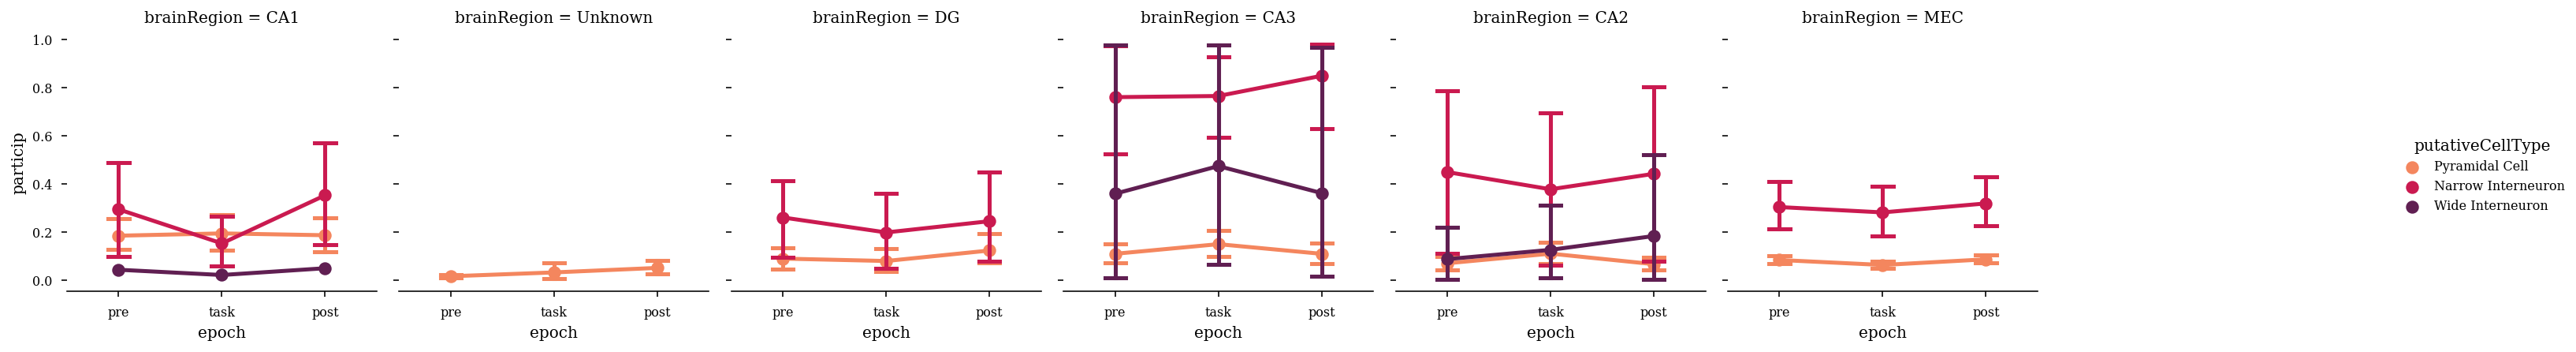

In [263]:
g = sns.catplot(x="epoch", y="particip", hue="putativeCellType",col='brainRegion',col_wrap=7,
                capsize=.2, palette="rocket_r", height=3, aspect=1,
                kind="point", data=df)
g.despine(left=True)

In [264]:
cell_metrics_df,data = loading.load_cell_metrics(sessions[6])

nChannels, fs, fs_dat, shank_to_channel = functions.loadXML(df.basepath[6])

task_epochs = nel.EpochArray([np.array([data['epochs'].startTime,data['epochs'].stopTime]).T])
for ep,name in zip(epochs,data['epochs'].name):
    print(name,ep.duration)
st = nel.SpikeTrainArray(timestamps=np.array(data['spikes'],dtype="object"), support=task_epochs, fs=fs_dat)
# pos = nel.AnalogSignalArray(data=[position.x1, position.y1],support=epochs, fs=fs_pos)
print(st)
# print(pos)
# position,fs_pos = functions.load_position(df.basepath[0]) 

pre 1:52:29:998 hours
task 1:03:34:697 hours
post 1:49:36:766 hours


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:709: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<SpikeTrainArray at 0x183dcf69ca0: 307 units (3 segments)> at 20000 Hz


In [265]:
def get_raster_points(spikes,peak_time):
    ''' 
    create raster centered over each ripple with a 1 second window
    '''
    x = []
    y = []
    for i,r in enumerate(peak_time):
        idx = (spikes> r - .5) & (spikes < r + .5)
        cur_spks = spikes[idx]
        if any(cur_spks):
            x.append(cur_spks - r)
            y.append(np.ones_like(cur_spks)+i)       
    x = list(itertools.chain(*x))
    y = list(itertools.chain(*y))
    return x, y

def get_h0_z_energy(x,y,binsize=0.005,window=30):
     # bin cell into 5ms bins 
    h0_counts, bin_edges = np.histogram(x, bins=np.arange(-0.5,0.5,binsize))
    # normalize into firing rate
    h0 = h0_counts / (len(np.unique(y))*binsize)
    # smooth to get expected firing rate
    hist_smooth = gaussian_filter1d(h0,window)
    # subtract the expected rates and devided by the standard deviation to get z-scored modulation
    z = (h0 - hist_smooth) / np.sqrt(hist_smooth)
    # Calculate the amplitude of the SWR modulation
    swr_energy = np.sqrt(sum(z**2))
    return h0, z, swr_energy, h0_counts

def bin_ripple_lag(x,y,binsize=0.005,window=0.5):
    # bin cell into 5ms bins 
    h0_counts, bin_edges = np.histogram(x, bins=np.arange(-window,window,binsize))
    # normalize into firing rate
    return h0_counts / (len(np.unique(y))*binsize)    


In [266]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "svg.fonttype": 'none'
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)

%config InlineBackend.figure_format ='retina'

# %config InlineBackend.figure_format='svg'

In [267]:
def get_hist_mat(st): 
    h0 = []
    for j,st_ in enumerate(st.data):
        x, y = get_raster_points(st_,ripple_df.peaks)
        h0.append(bin_ripple_lag(x,y))
    return np.array(h0)
pre_hist = get_hist_mat(st[0])
task_hist = get_hist_mat(st[1])
post_hist = get_hist_mat(st[2])

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support
<ipython-input-265-46a1704a1bea>:34: RuntimeWarning: invalid value encountered in true_divide


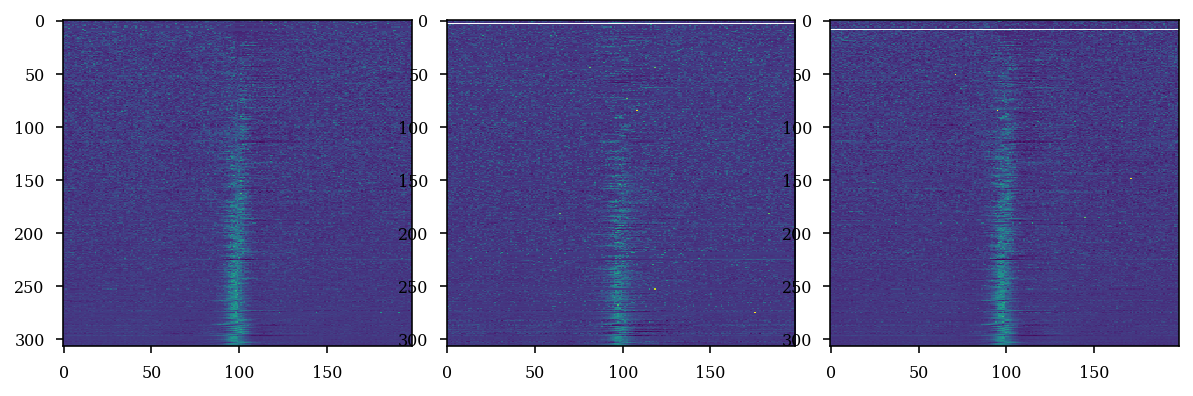

In [268]:

center_idx = int(pre_hist.shape[1]/2)
idx = np.mean(pre_hist[:,center_idx-1:center_idx+2],axis=1)
idx = np.argsort(idx)

fig, axs = plt.subplots(1,3, figsize=(10,3), edgecolor='k')
fig.subplots_adjust(hspace = .05, wspace=0.1)
ax = axs.ravel() 

ax[0].imshow(stats.zscore(pre_hist[idx],axis=1),aspect='auto',interpolation='nearest')
ax[1].imshow(stats.zscore(task_hist[idx],axis=1),aspect='auto',interpolation='nearest')
ax[2].imshow(stats.zscore(post_hist[idx],axis=1),aspect='auto',interpolation='nearest')

Text(0.5, 1.0, 'post')

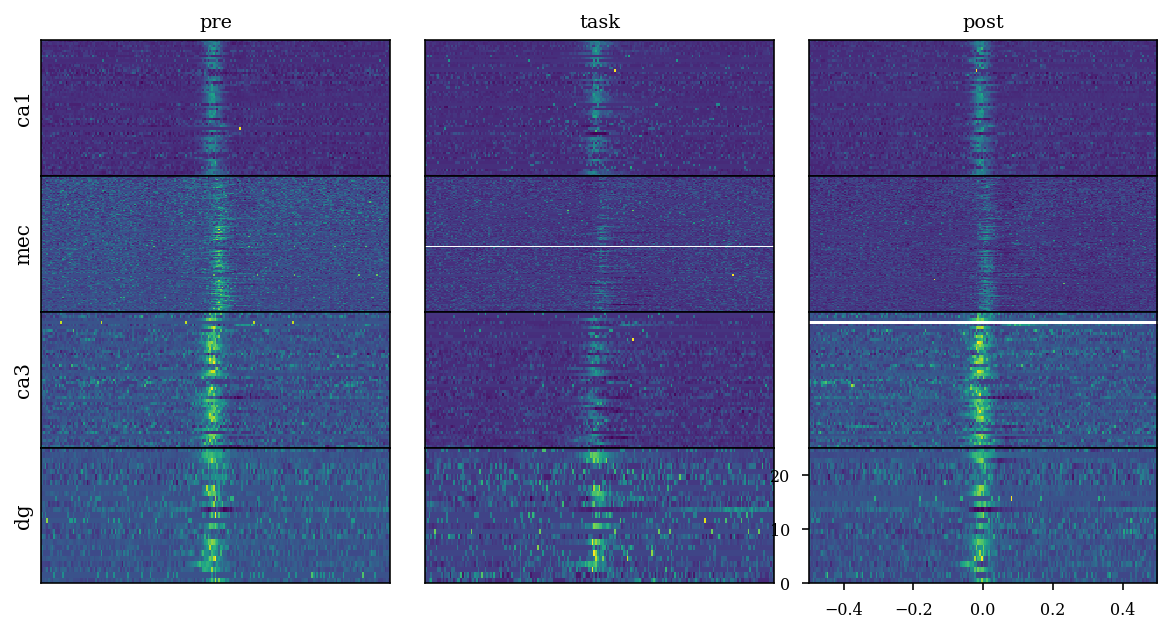

In [289]:

fig, axs = plt.subplots(4,3, figsize=(10,5), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=0.1)
ax = axs.ravel() 

region_idx = cell_metrics_df.brainRegion == 'CA1'
extent = [-.5 , .5, 0 , sum(region_idx)]
ax[0].imshow(stats.zscore(pre_hist[region_idx],axis=1),extent=extent,aspect='auto',interpolation='nearest')
ax[1].imshow(stats.zscore(np.array(task_hist)[region_idx],axis=1),extent=extent,aspect='auto',interpolation='nearest')
ax[2].imshow(stats.zscore(np.array(post_hist)[region_idx],axis=1),extent=extent,aspect='auto',interpolation='nearest')

region_idx = cell_metrics_df.brainRegion == 'MEC'
extent = [-.5 , .5, 0 , sum(region_idx)]
ax[3].imshow(stats.zscore(pre_hist[region_idx],axis=1),extent=extent,aspect='auto',interpolation='nearest')
ax[4].imshow(stats.zscore(np.array(task_hist)[region_idx],axis=1),extent=extent,aspect='auto',interpolation='nearest')
ax[5].imshow(stats.zscore(np.array(post_hist)[region_idx],axis=1),extent=extent,aspect='auto',interpolation='nearest')

region_idx = cell_metrics_df.brainRegion == 'CA3'
extent = [-.5 , .5, 0 , sum(region_idx)]
ax[6].imshow(stats.zscore(pre_hist[region_idx],axis=1),extent=extent,aspect='auto',interpolation='nearest')
ax[7].imshow(stats.zscore(np.array(task_hist)[region_idx],axis=1),extent=extent,aspect='auto',interpolation='nearest')
ax[8].imshow(stats.zscore(np.array(post_hist)[region_idx],axis=1),extent=extent,aspect='auto',interpolation='nearest')

region_idx = cell_metrics_df.brainRegion == 'DG'
extent = [-.5 , .5, 0 , sum(region_idx)]
ax[9].imshow(stats.zscore(pre_hist[region_idx],axis=1),extent=extent,aspect='auto',interpolation='nearest')
ax[10].imshow(stats.zscore(np.array(task_hist)[region_idx],axis=1),extent=extent,aspect='auto',interpolation='nearest')
ax[11].imshow(stats.zscore(np.array(post_hist)[region_idx],axis=1),extent=extent,aspect='auto',interpolation='nearest')

for i in range(11):
    ax[i].axes.get_xaxis().set_ticks([])
    ax[i].axes.get_yaxis().set_ticks([])

ax[0].set_ylabel('ca1')    
ax[3].set_ylabel('mec')    
ax[6].set_ylabel('ca3')    
ax[9].set_ylabel('dg')    

ax[0].set_title('pre')    
ax[1].set_title('task')    
ax[2].set_title('post')    





In [224]:
import matplotlib as mpl

class MidpointNormalize(mpl.colors.Normalize):
    '''
    https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib
    '''
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))
    
def confidence_intervals(X,conf=0.95):
    # remove nans
    X = X[np.sum(np.isnan(X),axis=1) == 0,:]
    # compute interval for each column
    interval = [stats.t.interval(conf, len(a) - 1, loc = np.mean(a), scale = stats.sem(a)) for a in X.T]
    interval = np.vstack(interval)
    lower = interval[:,0]
    upper = interval[:,1]
    return lower,upper

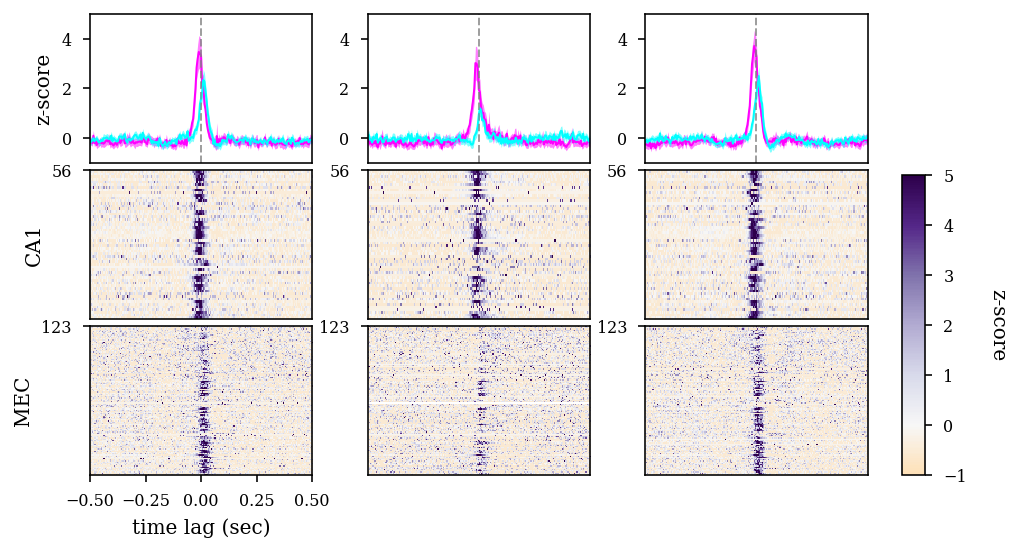

In [273]:
def plot_mod_matrix(h0_current,ax,x_off=False):
    norm = MidpointNormalize(vmin=-0.5, vmax=4.5, midpoint=0)
    h0_current = stats.zscore(h0_current,axis=1)

    extent = [-.5 , .5, 0 , h0_current.shape[0]]
    # plot matrix
    ax.imshow(h0_current,aspect='auto',extent=extent,cmap=plt.get_cmap('PuOr'),norm=norm,interpolation='nearest')
    # restrict to +-100ms
    ax.set_xlim(-0.5,0.5)
    ax.set_yticks([h0_current.shape[0]])
    if x_off:
        ax.axes.get_xaxis().set_ticks([])
    
def plot_mod_mean_std(h0_current,ax,color):
    h0_current = stats.zscore(h0_current,axis=1)
    x = np.linspace(-.5,.5,h0_current.shape[1]) 
    m = np.nanmean(h0_current,axis=0)
    
#     v = np.nanstd(h0_current,axis=0) / np.sqrt(h0_current.shape[0])
    lower,upper = confidence_intervals(h0_current)
    
    ax.plot(x,m, color = color, linewidth = 1)
#     ax.fill_between(x, m-v, m+v, color = color, alpha = 0.5, linewidth = 0)
    ax.fill_between(x, lower, upper, color = color, alpha = 0.5, linewidth = 0)
    ax.axvline(0, linestyle = '--', linewidth = 1, alpha = 0.5, color = 'grey')
    # ax.set_title(group+' '+area)
    ax.set_xlim(-0.5,0.5)
    ax.set_ylim(-1,5)
    ax.axes.get_xaxis().set_ticks([])
    

fig, axs = plt.subplots(3,3, figsize=(8,4), edgecolor='k')
fig.subplots_adjust(hspace = .05, wspace=.25)
ax = axs.ravel()  

cmap = plt.get_cmap("cool_r",2)

plot_mod_mean_std(pre_hist[cell_metrics_df.brainRegion == 'CA1'],ax[0],cmap(0))
ax[0].set_ylabel('z-score')
plot_mod_mean_std(pre_hist[cell_metrics_df.brainRegion == 'MEC'],ax[0],cmap(1))

plot_mod_mean_std(task_hist[cell_metrics_df.brainRegion == 'CA1'],ax[1],cmap(0))
plot_mod_mean_std(task_hist[cell_metrics_df.brainRegion == 'MEC'],ax[1],cmap(1))

plot_mod_mean_std(post_hist[cell_metrics_df.brainRegion == 'CA1'],ax[2],cmap(0))
plot_mod_mean_std(post_hist[cell_metrics_df.brainRegion == 'MEC'],ax[2],cmap(1))


plot_mod_matrix(pre_hist[cell_metrics_df.brainRegion == 'CA1'],ax[3],True)
plot_mod_matrix(pre_hist[cell_metrics_df.brainRegion == 'MEC'],ax[6])

plot_mod_matrix(task_hist[cell_metrics_df.brainRegion == 'CA1'],ax[4],True)
plot_mod_matrix(task_hist[cell_metrics_df.brainRegion == 'MEC'],ax[7],True)

plot_mod_matrix(post_hist[cell_metrics_df.brainRegion == 'CA1'],ax[5],True)
plot_mod_matrix(post_hist[cell_metrics_df.brainRegion == 'MEC'],ax[8],True)


ax[6].set_xlabel('time lag (sec)')
ax[3].set_ylabel('CA1')
ax[6].set_ylabel('MEC')

norm = MidpointNormalize(vmin=-1, vmax=5, midpoint=0)

# norm = mpl.colors.Normalize(vmin=-0.5, vmax=4.5)
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('PuOr'), norm=norm)
sm.set_array([])
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.83, 0.1, 0.02, 0.52])
cbar = plt.colorbar(sm,cax=cax)
cbar.set_label('z-score', rotation=270, labelpad=20)
# cbar.outline.set_visible(False)

In [281]:
sessions[6]

'A:\\Data\\AYA9\\day17'

CA1
Pyramidal Cell


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


Text(0.5, 1.0, 'sleep')

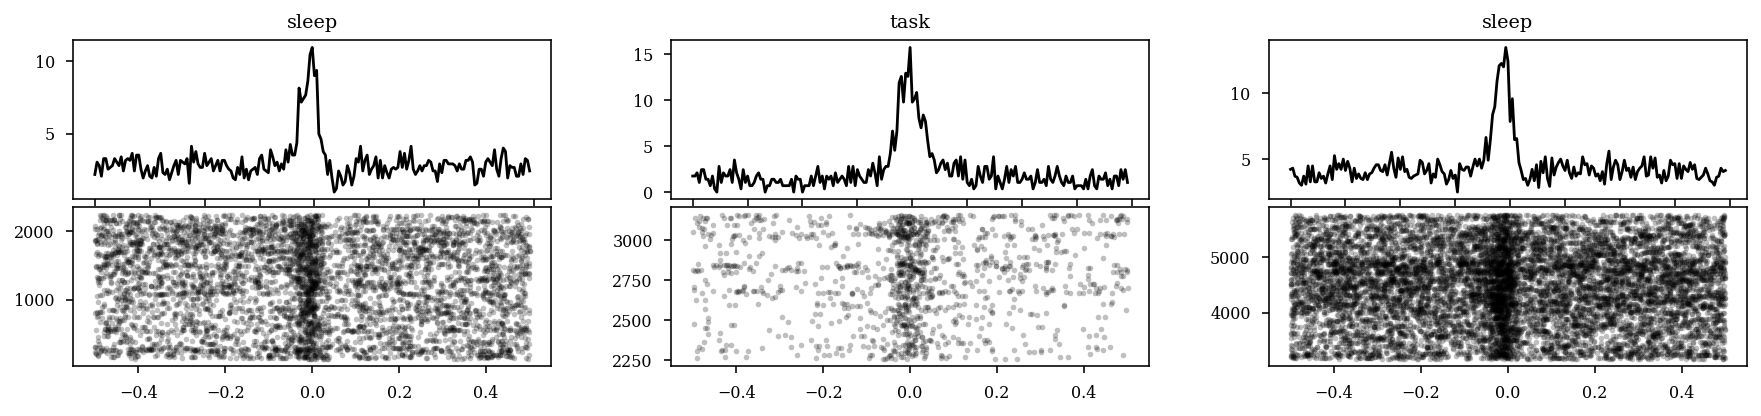

In [280]:

# 16
unit = 1

print(cell_metrics_df.loc[unit].brainRegion)
print(cell_metrics_df.loc[unit].putativeCellType)

fig, axs = plt.subplots(2,3, figsize=(15,3), edgecolor='k')
fig.subplots_adjust(hspace = .05, wspace=.25)
ax = axs.ravel()  

x, y = get_raster_points(st[0].data[unit],ripple_df.peaks)
h0 = bin_ripple_lag(x,y)
ax[0].plot(h0,'k')
ax[3].plot(x,y,'.k',alpha=.25)

x, y = get_raster_points(st[1].data[unit],ripple_df.peaks)
h0 = bin_ripple_lag(x,y)
ax[1].plot(h0,'k')
ax[4].plot(x,y,'.k',alpha=.25)

x, y = get_raster_points(st[2].data[unit],ripple_df.peaks)
h0 = bin_ripple_lag(x,y)
ax[2].plot(h0,'k')
ax[5].plot(x,y,'.k',alpha=.25)

ax[0].set_title('sleep')
ax[1].set_title('task')
ax[2].set_title('sleep')


In [100]:
st.n_intervals

4